In [22]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [23]:
df = df[df['job_title_short'] == 'Data Analyst'].copy()

## Pie Plots
Syntax: plt.pie(df['data'], labels=df['category'], autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'yellow'], explode=(0.1, 0, 0, 0))

<function matplotlib.pyplot.show(close=None, block=None)>

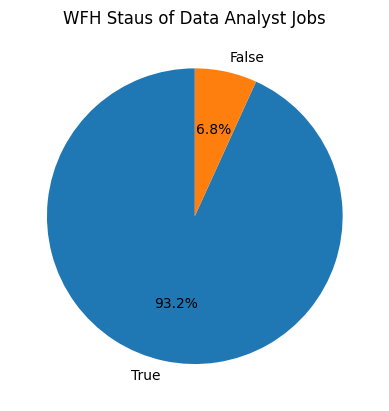

In [24]:
# WFH Data Analyst jobs
wfh = df['job_work_from_home'].value_counts()

plt.pie(wfh, labels = ['True', 'False'], autopct='%1.1f%%', startangle=90)
plt.title('WFH Staus of Data Analyst Jobs')
plt.show

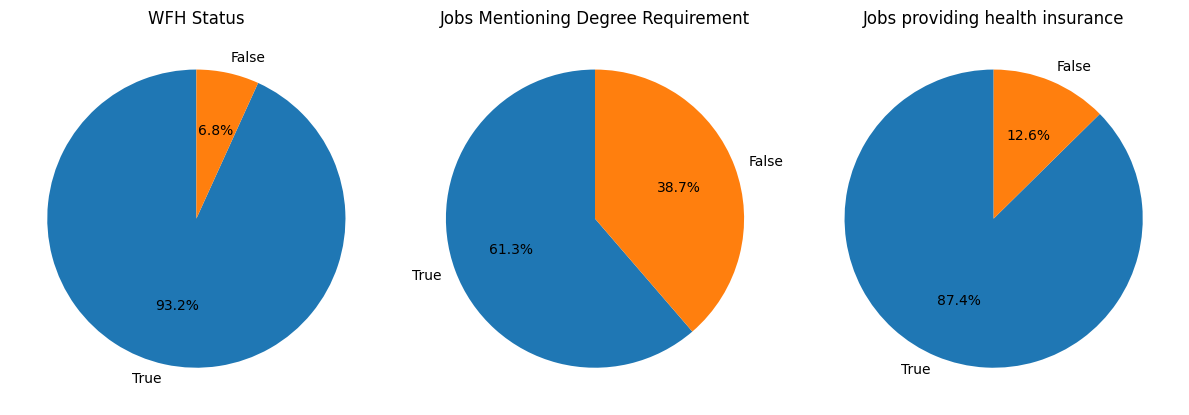

In [25]:
# Subplots with WFH status, Degree Mention, Job Health Insurance
degree = df['job_no_degree_mention'].value_counts()

health = df['job_health_insurance'].value_counts()

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

plt.subplot(1,3,1)
plt.pie(wfh,labels = ['True', 'False'], autopct='%1.1f%%', startangle=90)
plt.title('WFH Status')

plt.subplot(1,3,2)
plt.pie(degree,labels = ['True', 'False'], autopct='%1.1f%%', startangle=90)
plt.title('Jobs Mentioning Degree Requirement')

plt.subplot(1,3,3)
plt.pie(health, labels = ['True', 'False'], autopct='%1.1f%%', startangle=90)
plt.title('Jobs providing health insurance')

plt.tight_layout()
plt.show()

## Scatter plot 
Syntax: plt.scatter(df['x'], df['y'], s=df['size'], c=df['color'], alpha=0.5, marker='o')

In [26]:
df = df[df['job_title_short'] == 'Data Analyst'].copy()
df.head(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
46,Data Analyst,"Data Analyst (Bangkok Based, relocation provided)","Rome, Metropolitan City of Rome Capital, Italy",via LinkedIn,Full-time,False,Italy,2023-10-30 13:13:21,False,False,Italy,None,NaN,NaN,Agoda,"[sas, sas, r, python, vba, sql, java, sql serv...","{'analyst_tools': ['sas', 'spss', 'tableau', '..."
67,Data Analyst,Stage - Data Analyste Finance H/F,"Paris, France",via Emplois Trabajo.org,Full-time and Internship,False,France,2023-11-07 13:37:53,False,False,France,None,NaN,NaN,Kepler Cheuvreux,[excel],{'analyst_tools': ['excel']}
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"


In [27]:
df_exploded = df.explode(column= 'job_skills')

In [28]:
skills_stats = df_exploded.groupby('job_skills').agg(
    median_salary = ('salary_year_avg', 'median'),
    skill_count = ('job_skills', 'count')
)

skills_stats = skills_stats.sort_values(by='skill_count', ascending = False).head(10)
skills_stats

,median_salary,skill_count
job_skills,,
sql,92500.0,92428
excel,84479.0,66860
python,98500.0,57190
tableau,95000.0,46455
power bi,90000.0,39380
r,92527.5,29996
sas,90000.0,27998
powerpoint,85000.0,13822
word,80000.0,13562


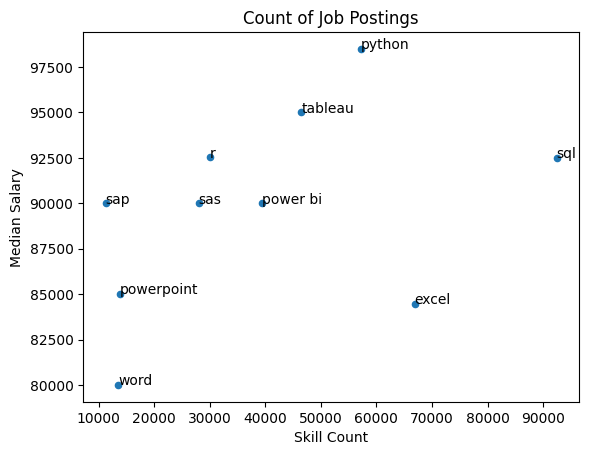

In [29]:
skills_stats.plot(kind='scatter', x='skill_count', y='median_salary')
for i, txt in enumerate(skills_stats.index): 
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)
plt.title('Count of Job Postings')
plt.xlabel('Skill Count')
plt.ylabel('Median Salary')
plt.tight_layout
plt.show()

## Histogram 
Syntax: hist(x, bins=None, range=None)



In [31]:
df_da_us = df[(df['job_title_short']=='Data Analyst') & (df['job_location']=='United States')].copy()
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])


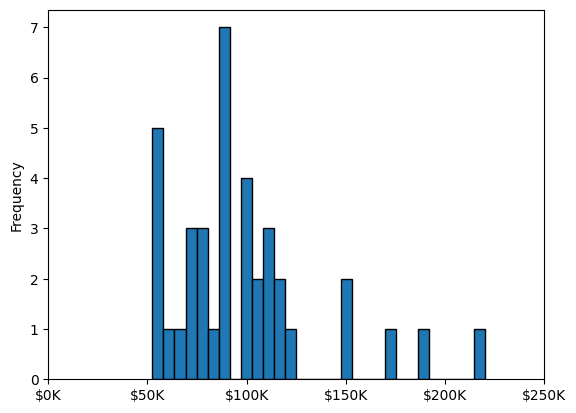

In [34]:
df_da_us['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))



## Box Plot 
Syntax: boxplot(column=['column1', 'column2', ...], by=None, vert=False)

In [35]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

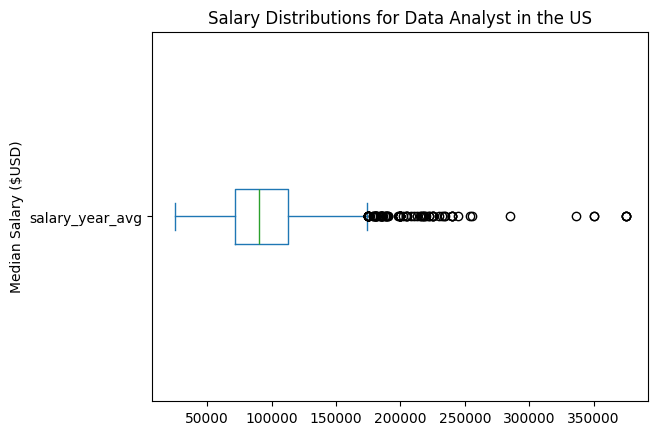

In [36]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)
plt.title('Salary Distributions for Data Analyst in the US')
plt.ylabel('Median Salary ($USD)')
plt.show()

In [37]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_location']=='United States')]

/var/folders/2x/bbsf999n3xzfgw628wnbdkw40000gn/T/ipykernel_74670/109708452.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


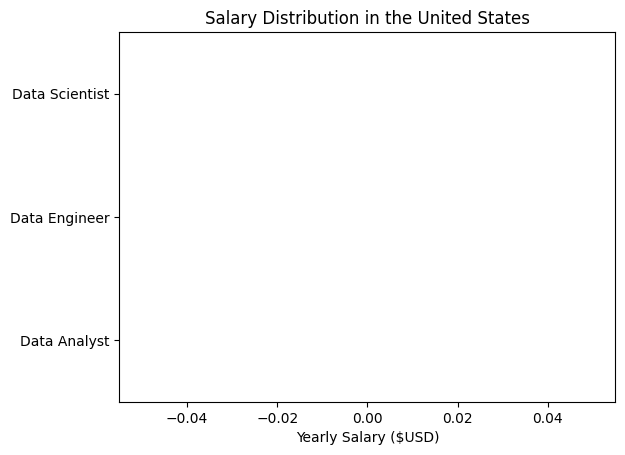

In [39]:
job_list = [df_us[df_us['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.show()